## Aufgabe 46
In folgender Aufgabe wird die gleiche Grafik, wie aus Aufgabe
45 betrachtet. Die Grafik beschreibt zwei Laborwerte $x_1$ und $x_2$ von fünfzehn
Patient:innen (schwarz = Krebs, weiß = Kontrollen). Für den neuen Patienten
(dargestellt als Stern) soll der Krebsstatus vorhergesagt werden. Verwenden Sie
den Entscheidungsbaum Algorithmus, um den neuen Patienten zu klassifizieren. Treffen Sie dafür Annahmen, wie Sie eine Einteilung in Subpopulationen
vornehmen können und zeichnen Sie den entsprechenden Entscheidungsbaum.
Wie können Sie die Wahrscheinlichkeit, dass der neue Patient an Krebs erkrankt ist, bestimmen?
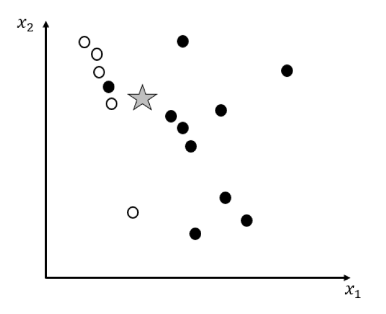

#### Einteilung:

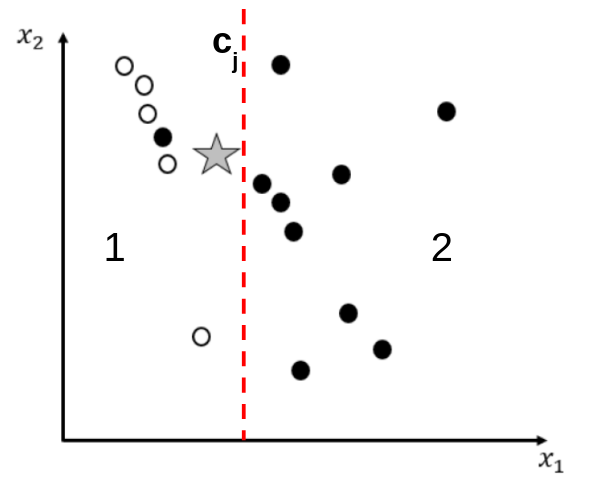

Annahme:
- Population links: Kontrolle
- Population rechts: Krebs

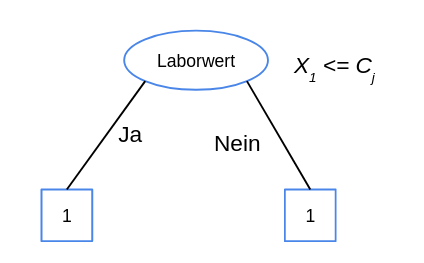

Wahrscheinlichtkeit bestimmen: Gleiches vorgehen wie bei kNN. In unserem Fall gibt es in der ersten Gruppe 5 von 6 nicht-erkrankten, während eine Person erkrankt ist. Dies würde bedeuten, dass die Wahrscheinlichkeit für ein weiteres Element in dieser Gruppe (Stern) $\frac{5}{6} \approx 83\%$ wäre, während sie in der anderen Gruppe $\frac{9}{9} = 100\%$ wäre.

## Aufgabe 47
Gegeben sein folgende Datenpunkte in einem dreidimensionalen
Raum:
- $X_1 = (2, 3, 4)$ mit Label grün
- $X_2 = (1, 1, 1)$ mit Label blau
- $X_3 = (5, 3, 2)$ mit Label blau
- $X_4 = (2, 2, 1)$ mit Label grün
Zudem sei ein neuer Punkt $X^* = (3, 2, 3)$ gegeben. Welcher der vier Datenpunkte ist der am nächsten an $X^*$ gelegene? Benutzen Sie dabei zur Berechnung des Abstandes den Euklidischen Abstand. Welches Label würde man $X^*$
bei einem kNN Verfahren mit $k = 3$ zuordnen?

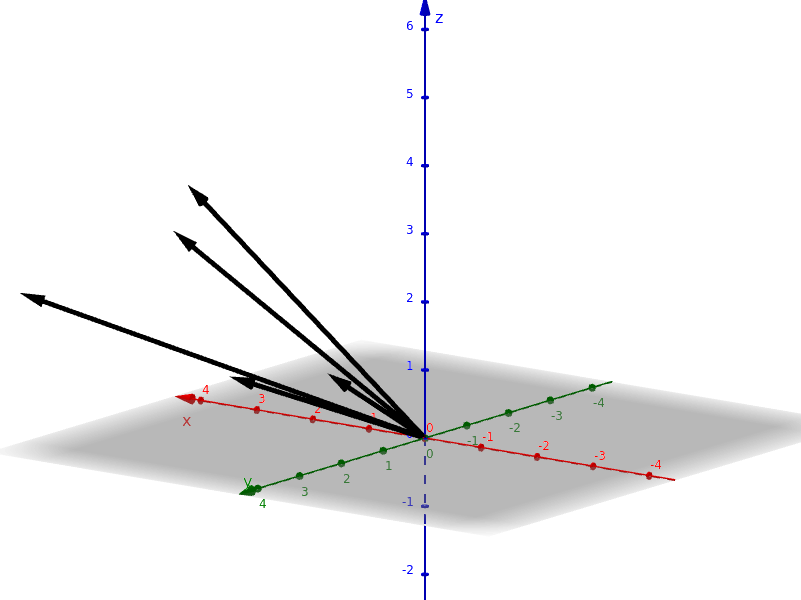

$$
X_1 \text{ zu } X^*: d(X_1, X^*) = ||X_1 - X^*||_2 = \sqrt{(2 - 3)^2 + (3 - 2)^2 + (4 - 3)^2} = \sqrt{3}
$$

$$
d(X_2, X^*) = \sqrt{(1 - 3)^2 + (1 - 2)^2 + (1 - 3)^2} = \sqrt{-2^2 -1^2 -2^2} = \sqrt{4+1+4} = \sqrt{9}
$$

$$
d(X_3, X^*) = \sqrt{(5 - 3)^2 + (3 - 2)^2 + (2 - 3)^2} = \sqrt{2^2 + 1^2 - 1^2} = \sqrt{6}
$$

$$
d(X_4, X^*) = \sqrt{(2 - 3)^2 + (2 - 2)^2 + (1 - 3)^2} = \sqrt{-1^2 + 0 -2^2} = \sqrt{5}
$$

Demnach wäre $X_1$ der am nächsten gelegene Punkt an $X^*$

Bei $k=3$ würde man erst die 3 nächsten Nachbarn finden, nämlich:
- Nachbar 1: $X_1$ (grün)
- Nachbar 2: $X_4$ (blau)
- Nachbar 3: $X_3$ (blau)

| |Wahrscheinlichkeit grün|Wahrscheinlichkeit blau|
|---|---|---|
|$k=3$|$\frac{1}{3}$|$\frac{2}{3}$|

## Aufgabe 48
Betrachten Sie den Datensatz readingSkills aus dem R-Paket
party. Dieser enthalt Alter, Schuhgröße und Abschneiden in einem Lesetest
von 200 Kindern. Zudem gibt es die Angabe, ob es sich bei den Kindern um
Muttersprachler handelt oder nicht.
Teilen Sie den Datensatz im Verhältnis 3:1 in Trainings- und Testdaten auf.
Prädizieren Sie die Muttersprache mittels Random Forest. Wie ist die Missklassifikationsrate des Verfahrens?

In [9]:
# install.packages("party")
# install.packages("randomForest")
# install.packages("caTools")

library(randomForest)
library(caTools)
library(party)

data("readingSkills", package="party")

head(readingSkills)

set.seed(4815123)

,nativeSpeaker,age,shoeSize,score
,<fct>,<int>,<dbl>,<dbl>
1,yes,5,24.83189,32.29385
2,yes,6,25.95238,36.63105
3,no,11,30.42170,49.60593
4,yes,7,28.66450,40.28456
5,yes,11,31.88207,55.46085
6,yes,10,30.07843,52.83124


In [2]:
split <- sample.split(readingSkills$nativeSpeaker, SplitRatio=0.75)
training_set <- subset(readingSkills, split==TRUE)
test_set <- subset(readingSkills, split==FALSE)

rf_model <- randomForest(nativeSpeaker ~ ., data=training_set)
print(rf_model)


Call:
 randomForest(formula = nativeSpeaker ~ ., data = training_set) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 0.67%
Confusion matrix:
    no yes class.error
no  75   0  0.00000000
yes  1  74  0.01333333


In [3]:
predictions <- predict(rf_model, newdata=test_set)

confusion_matrix <- table(test_set$nativeSpeaker, predictions)
print(confusion_matrix)

     predictions
      no yes
  no  24   1
  yes  0  25


In [4]:
misclassification_rate <- sum(diag(confusion_matrix) / sum(confusion_matrix))
misclassification_rate <- 1 - misclassification_rate
print(misclassification_rate)

[1] 0.02


## Aufgabe 49
Betrachten Sie weiterhin die Klassifiaktion von Muttersprachlern
im readingSkills Datensatz. Entfernen Sie die Schuhgröße aus dem Datensatz. Teilen Sie den Datensatz in dieselben Trainings- und Testdaten wie in
Aufgabe 48 auf und prädizieren Sie die Muttersprache erneut mittels Random
Forest. Hat sich die Missklassifikationsrate verbessert?

In [5]:
data_new <- readingSkills[, -3]
head(data_new)

,nativeSpeaker,age,score
,<fct>,<int>,<dbl>
1,yes,5,32.29385
2,yes,6,36.63105
3,no,11,49.60593
4,yes,7,40.28456
5,yes,11,55.46085
6,yes,10,52.83124


In [6]:
split <- sample.split(data_new$nativeSpeaker, SplitRatio=0.75)
training_set <- subset(data_new, split==TRUE)
test_set <- subset(data_new, split==FALSE)

rf_model <- randomForest(nativeSpeaker ~ ., data=training_set)
print(rf_model)


Call:
 randomForest(formula = nativeSpeaker ~ ., data = training_set) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 2%
Confusion matrix:
    no yes class.error
no  73   2  0.02666667
yes  1  74  0.01333333


In [7]:
predictions <- predict(rf_model, newdata=test_set)

confusion_matrix <- table(test_set$nativeSpeaker, predictions)
print(confusion_matrix)

     predictions
      no yes
  no  25   0
  yes  0  25


In [8]:
misclassification_rate <- sum(diag(confusion_matrix) / sum(confusion_matrix))
misclassification_rate <- 1 - misclassification_rate
print(misclassification_rate)

[1] 0


## Aufgabe 50
Betrachten Sie weiterhin die Klassifiaktion von Muttersprachlern im readingSkills Datensatz. Bestimmen Sie mittels 5-facher Kreuzvalidierung und Bootstrap (mit M=1000) die beste Wahl des Parameters k im
kNN Verfahren.

In [2]:
# Installieren und Laden der notwendigen Pakete
install.packages("party")
install.packages("class")
install.packages("caret")
install.packages("boot")

library(party)
library(class)
library(caret)
library(boot)

# Laden des readingSkills Datensatzes
data("readingSkills", package = "party")

# Funktion zur kNN Klassifikation
knn_fit <- function(train, test, k) {
  trainX <- as.matrix(train[, -ncol(train)])
  trainY <- train[, ncol(train)]
  testX <- as.matrix(test[, -ncol(test)])
  pred <- knn(train = trainX, test = testX, cl = trainY, k = k)
  return(pred)
}

# Funktion zur Berechnung der Fehlklassifikationsrate
misclassification_rate <- function(pred, true) {
  return(mean(pred != true))
}

# 5-fache Kreuzvalidierung und Bootstrap
set.seed(123) # Set seed for reproducibility

# Parameterbereich für k
k_values <- 1:20

# Speichern der Fehlklassifikationsraten
results <- matrix(0, nrow = length(k_values), ncol = 2)
colnames(results) <- c("k", "misclassification_rate")

# 5-fache Kreuzvalidierung mit Bootstrap
for (k in k_values) {
  cv_results <- trainControl(method = "cv", number = 5)
  model <- train(nativeSpeaker ~ ., data = readingSkills, method = "knn",
                 trControl = cv_results, tuneGrid = data.frame(k = k))

  # Bootstrap
  bootstrap_results <- boot(data = readingSkills, statistic = function(data, indices) {
    train <- data[indices, ]
    test <- data[-indices, ]
    pred <- knn_fit(train, test, k)
    return(misclassification_rate(pred, test$nativeSpeaker))
  }, R = 1000)
  
  # Durchschnittliche Fehlklassifikationsrate speichern
  results[k, ] <- c(k, mean(bootstrap_results$t))
}

# Beste Wahl des Parameters k
best_k <- results[which.min(results[, 2]), ]
print(best_k)

# Anzeige der Fehlklassifikationsraten für alle k
print(results)

# Beste Wahl des Parameters k und dazugehörige Fehlklassifikationsrate
cat("Beste Wahl für k:", best_k[1], "mit einer Fehlklassifikationsrate von:", best_k[2], "\n")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘colorspace’, ‘diagram’, ‘lava’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘tzdb’, ‘prodlim’, ‘timechange’, ‘stringi’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘proxy’, ‘iterators’, ‘data.table’, ‘dplyr’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘lubridate’, ‘magrittr’, ‘purrr’, ‘tidyr’, ‘timeDate’, ‘stringr’, ‘ggplot2’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package:

ERROR: Error in knn(train = trainX, test = testX, cl = trainY, k = k): NA/NaN/Inf in foreign function call (arg 6)
